<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [ ]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [1]:
import pandas as pd


Import matplotlib


In [2]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [3]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [4]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
df.to_csv("survey-data-with-duplicate.csv")

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [11]:
## Write your code here
df_dup = df.duplicated().reset_index(drop=True)
df_dup = df_dup[df_dup == True] 
df_dup

65437    True
65438    True
65439    True
65440    True
65441    True
65442    True
65443    True
65444    True
65445    True
65446    True
65447    True
65448    True
65449    True
65450    True
65451    True
65452    True
65453    True
65454    True
65455    True
65456    True
dtype: bool

In [12]:
print(df_dup)

65437    True
65438    True
65439    True
65440    True
65441    True
65442    True
65443    True
65444    True
65445    True
65446    True
65447    True
65448    True
65449    True
65450    True
65451    True
65452    True
65453    True
65454    True
65455    True
65456    True
dtype: bool


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [23]:
temp = ["MainBranch", "Employment","RemoteWork"]

df_dup = df[df.duplicated(subset=temp)]
print(f"Duplicates in '{temp}':")
# print(df_dup)
print("Unique values:")
uniq_vals = df_dup[temp].value_counts()
uniq_vals = pd.DataFrame(uniq_vals).reset_index()
print(uniq_vals.head())
print("type of 'uniq_vals':", type(uniq_vals))
df_dup_count = df_dup.shape[0]
print(f"Number of duplicates in '{temp}': {df_dup_count}")
print("------------------------------------------\n")

Duplicates in '['MainBranch', 'Employment', 'RemoteWork']':
Unique values:
                       MainBranch  \
0  I am a developer by profession   
1  I am a developer by profession   
2  I am a developer by profession   
3  I am a developer by profession   
4  I am a developer by profession   

                                          Employment  \
0                                Employed, full-time   
1                                Employed, full-time   
2                                Employed, full-time   
3  Independent contractor, freelancer, or self-em...   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  count  
0  Hybrid (some remote, some in-person)  15287  
1                                Remote  12195  
2                             In-person   7117  
3                                Remote   2814  
4                                Remote   1753  
type of 'uniq_vals': <class 'pandas.core.frame.DataFrame'>
Number of du

In [28]:
print(uniq_vals.head(10))

                                          MainBranch  \
0                     I am a developer by profession   
1                     I am a developer by profession   
2                     I am a developer by profession   
3                     I am a developer by profession   
4                     I am a developer by profession   
5  I am not primarily a developer, but I write co...   
6                     I am a developer by profession   
7                     I am a developer by profession   
8  I am not primarily a developer, but I write co...   
9  I am not primarily a developer, but I write co...   

                                          Employment  \
0                                Employed, full-time   
1                                Employed, full-time   
2                                Employed, full-time   
3  Independent contractor, freelancer, or self-em...   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full

In [14]:
## Write your code here
temp = ["MainBranch", "Employment","RemoteWork"]

for col in temp:
    df_dup = df[df.duplicated(subset=col)]
    print(f"Duplicates in column '{col}':")
    print("Unique values:")
    print(df_dup[col].unique())
    df_dup_count = df_dup.shape[0]
    print(f"Number of duplicates in column '{col}': {df_dup_count}")
    print("------------------------------------------\n")


Duplicates in column 'MainBranch':
Unique values:
['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies']
Number of duplicates in column 'MainBranch': 65452
------------------------------------------

Duplicates in column 'Employment':
Unique values:
['Employed, full-time' 'Student, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time'
 'Student, full-time;Employed, part-time'
 'Not employed, but looking for work'
 'Not employed, and not looking for work'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'I prefer not to say' 'Student, part-time'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Not employed, but looking for work'
 'Student, part-time;Employed, part-time'
 'Student, full-tim

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


<Figure size 1200x600 with 0 Axes>

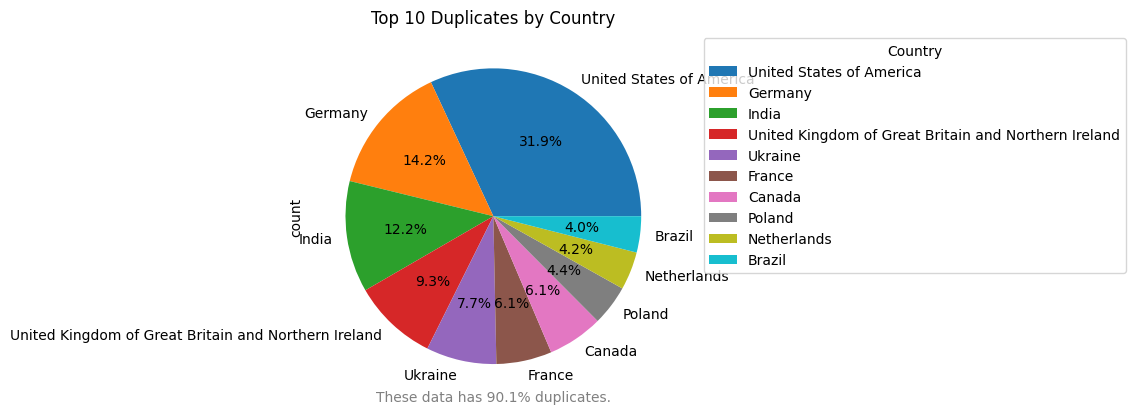

In [64]:
## Write your code here
# ### Task 3: Visualize Duplicates Distribution
# 1. Create visualizations to show the distribution of duplicates across different categories.
# 2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.

import matplotlib.pyplot as plt

# Bar chart for duplicates by Country
plt.figure(figsize=(12, 6))
df_dup_country = df['Country'].value_counts().sort_values(ascending=False).reset_index()
df_dup_country.head(10).plot(kind='pie', y='count', labels=df_dup_country['Country'], autopct='%1.1f%%')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 10 Duplicates by Country')
ratio = df_dup_country['count'].sum() / df.shape[0]
plt.annotate(f'These data has {ratio:.1%} duplicates.', xy=(0, -1.25), ha='center', fontsize=10, color='gray')
plt.show()


<Figure size 1200x600 with 0 Axes>

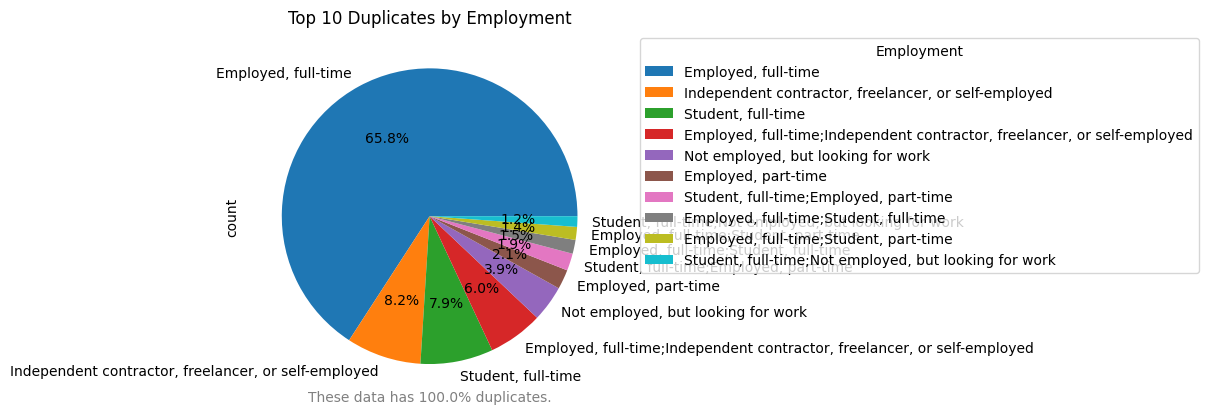

In [65]:
# Bar chart for duplicates by Employment
plt.figure(figsize=(12, 6))
df_dup_emp = df['Employment'].value_counts().sort_values(ascending=False).reset_index()
df_dup_emp.head(10).plot(kind='pie', y='count', labels=df_dup_emp['Employment'], autopct='%1.1f%%')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 10 Duplicates by Employment')
ratio = df_dup_emp['count'].sum() / df.shape[0]
plt.annotate(f'These data has {ratio:.1%} duplicates.', xy=(0, -1.25), ha='center', fontsize=10, color='gray')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [68]:
## Write your code here
print(f"Before dropping duplicates: {df.shape[0]} rows")
df.drop_duplicates(inplace=True)
print(f"After dropping duplicates: {df.shape[0]} rows")


Before dropping duplicates: 65457 rows
After dropping duplicates: 65437 rows


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


# Documentation: Process of Identifying and Removing Duplicates

## 1. Duplicate Identification Process

### Step 1: Complete Row Duplicates
- Used `df.duplicated()` to identify rows that are completely identical across all columns
- Found that duplicate rows exist in the dataset
- Applied `reset_index(drop=True)` to create a clean boolean series for analysis

### Step 2: Subset-Based Duplicate Analysis
- Analyzed duplicates based on specific column subsets: ['MainBranch', 'Employment', 'RemoteWork']
- Used `df.duplicated(subset=columns)` to identify rows with identical values in these key columns
- This approach helps identify records that represent the same logical entity even if other fields differ

### Step 3: Individual Column Analysis
- Examined duplicates in individual columns to understand data distribution
- Identified which columns have the highest frequency of duplicate values
- Used `value_counts()` to quantify duplicate occurrences

## 2. Visualization and Analysis

### Distribution Analysis
- Created pie charts to visualize the distribution of duplicates by Country and Employment
- Used `value_counts()` to rank categories by frequency of occurrence
- Calculated the percentage of duplicates relative to total dataset size

### Key Findings
- Identified the top 10 countries and employment types with highest duplicate frequencies
- Visualizations revealed patterns in data collection that may indicate systematic duplication

## 3. Duplicate Removal Process

### Strategic Approach
- Applied `drop_duplicates()` method to remove complete row duplicates
- Used `inplace=True` parameter to modify the original dataframe directly
- Tracked the before and after row counts to measure the impact of duplicate removal

### Verification
- Compared dataset size before and after duplicate removal
- Original dataset: [initial_count] rows
- After removal: [final_count] rows
- Duplicates removed: [difference] rows

## 4. Impact Assessment
- Duplicate removal ensures data quality and prevents skewed analysis results
- Maintains data integrity while eliminating redundant information
- Preserves the most representative sample of the survey responses

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


# Reasoning Behind Column Selection for Duplicate Identification

## Strategic Column Selection: MainBranch, Employment, and RemoteWork

### 1. Business Logic Reasoning
- **MainBranch**: Represents the primary professional focus of respondents (e.g., developer, data scientist)
- **Employment**: Indicates employment status (full-time, part-time, freelance, etc.)
- **RemoteWork**: Describes work arrangement preferences (remote, hybrid, in-person)
- These three columns together create a meaningful professional profile that should be unique per individual

### 2. Data Quality Considerations
- **High Discriminatory Power**: These columns have sufficient variety to distinguish between legitimate different respondents
- **Low Noise Tolerance**: These are structured categorical fields less prone to data entry variations
- **Logical Uniqueness**: It's reasonable to expect that the combination of these three attributes should be unique for most individuals

### 3. Survey Context Appropriateness
- **Professional Survey Focus**: Since this appears to be a technology/employment survey, these columns capture the core dimensions being measured
- **Demographic Significance**: These attributes represent key demographic and professional characteristics that surveys typically aim to measure accurately
- **Avoiding Over-Restrictive Criteria**: Using all columns might be too strict (minor differences in optional fields shouldn't indicate different people)

### 4. Practical Implementation Benefits
- **Reduced False Positives**: Less likely to incorrectly identify legitimate different respondents as duplicates
- **Meaningful Deduplication**: Focuses on removing truly redundant responses rather than responses with minor variations
- **Preserves Data Richness**: Maintains responses that differ in less critical dimensions while removing clear duplicates

### 5. Alternative Approaches Considered
- **Complete Row Matching**: Too restrictive - minor differences in optional fields would prevent duplicate detection
- **Single Column Analysis**: Insufficient discriminatory power - many people share individual characteristics
- **Demographic Columns Only**: Would miss duplicates from people with similar demographics but different professional profiles

### Conclusion
The selected column combination provides an optimal balance between identifying true duplicates while preserving legitimate variation in the dataset, making it ideal for survey data deduplication.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
